In [23]:
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_study_raw_df = pd.merge(mouse_metadata,study_results, on="Mouse ID")

# Display the data table for preview
mouse_study_raw_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [24]:
# Checking the number of mice.
mouse_study_raw_df.nunique()["Mouse ID"]

249

In [25]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_df = mouse_study_raw_df[mouse_study_raw_df.duplicated()]

duplicate_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [26]:
# Optional: Get all the data for the duplicate mouse ID. 

mouse_study_raw_df.loc[mouse_study_raw_df["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_g989 = mouse_study_raw_df[mouse_study_raw_df['Mouse ID'] == "g989"].index

mouse_study_raw_df.drop(mouse_g989, inplace=True)

mouse_study_clean = mouse_study_raw_df

mouse_study_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [28]:
#checking new dataframe to see if duplicates values were removed
duplicate_check = mouse_study_clean[mouse_study_clean.duplicated()]
duplicate_check

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [29]:
# Checking the number of mice in the clean DataFrame.  This number is the same as mouse_study_raw_df because the mouse count was not the problem, it was the combo duplicate value found on Timepoint from the Study_Results. 
mouse_study_clean.nunique()["Mouse ID"]

248

## Summary Statistics

In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_summary_df = mouse_study_clean.groupby('Drug Regimen')

tumor_volume_df = pd.DataFrame(
{"Tumor Volume Mean" : regimen_summary_df['Tumor Volume (mm3)'].mean(),
"Tumor Volume Median" : regimen_summary_df['Tumor Volume (mm3)'].median(),
"Tumor Volume Variance" : regimen_summary_df['Tumor Volume (mm3)'].var(),
"Tumor Volume Std. Dev." : regimen_summary_df['Tumor Volume (mm3)'].std(),
"Tumor Volume Std. Err." : regimen_summary_df['Tumor Volume (mm3)'].sem(),})
tumor_volume_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [31]:
#Using the aggregation method, produce the same summary statistics in a single line.
regimen_summary_df['Tumor Volume (mm3)'].aggregate(["mean","median","var","std","sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

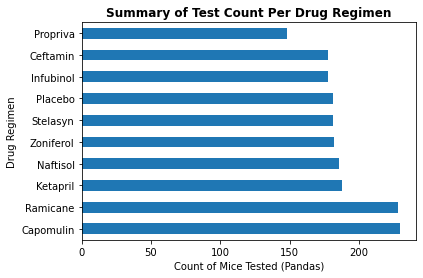

In [32]:
#prep a dataframe for the bar charts. 
test_count = mouse_study_clean["Drug Regimen"].value_counts()
test_count_df = test_count.to_frame().reset_index().rename(columns={'index': 'Drug Regimen', 'Drug Regimen': 'Mice Tested'})
test_count_df

# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
test_count_df.plot(kind='barh', x='Drug Regimen', y='Mice Tested', legend=False)
plt.xlabel('Count of Mice Tested (Pandas)')
plt.title("Summary of Test Count Per Drug Regimen", fontweight='bold')
plt.savefig('images/treatmentcountbar.png',bbox_inches = "tight")
plt.show()

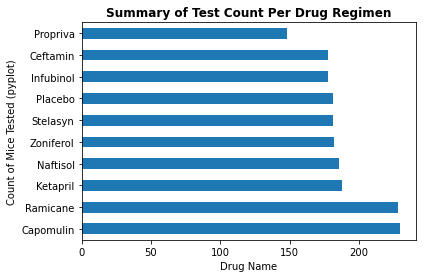

In [33]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
test_count.plot.barh()
plt.xlabel("Drug Name")
plt.ylabel("Count of Mice Tested (pyplot)")
plt.title("Summary of Test Count Per Drug Regimen", fontweight='bold'); #adding the semi column removes the test summary print before the bar chart
plt.show()

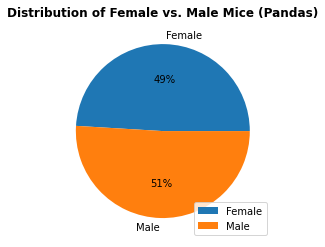

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Group by sex and count the number of mice
sex_grouped = mouse_study_clean.groupby('Sex').count()

# Create pie plot using Pandas
sex_grouped.plot(kind='pie', y='Mouse ID', autopct='%1.0f%%')
plt.ylabel('')
plt.title('Distribution of Female vs. Male Mice (Pandas)', fontweight='bold')
plt.legend(loc='lower right')
plt.savefig('images/malefemalepie.png',bbox_inches = "tight")
plt.show()

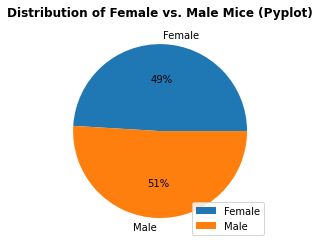

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_grouped['Mouse ID'], labels=sex_grouped.index, autopct='%1.0f%%');
plt.title('Distribution of Female vs. Male Mice (Pyplot)',fontweight='bold')
plt.legend(loc='lower right')
plt.show()


## Quartiles, Outliers and Boxplots

In [44]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = mouse_study_clean.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tumor_vol = pd.merge(last_timepoint, mouse_study_clean, on=['Mouse ID', 'Timepoint'], how='left')

# Define a list of the four treatment regimens
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Select only the data for the four treatments
final_tumor_vol = last_tumor_vol.loc[last_tumor_vol['Drug Regimen'].isin(treatments)]

# Display the resulting DataFrame
final_tumor_vol[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]


,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
3,a275,Ceftamin,62.999356
6,a411,Ramicane,38.407618
7,a444,Ramicane,43.047543
...,...,...,...
238,y769,Ceftamin,68.594745
239,y793,Capomulin,31.896238
240,y865,Ceftamin,64.729837
244,z578,Ramicane,30.638696


In [37]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vols = []

# Create a list to store the labels for each box
box_labels = []

# Loop through each treatment regimen
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor_vol.loc[final_tumor_vol['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_vols.append(tumor_vol)
    
    # Append the treatment label to the box_labels list
    box_labels.append(treatment)
    
    # Calculate the quartiles and IQR
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    # Print the results
    print(f"Results for {treatment}:")
    print(f"The lower quartile of tumor volume is: {lowerq:.2f}");
    print(f"The upper quartile of tumor volume is: {upperq:.2f}");
    print(f"The interquartile range of tumor volume is: {iqr:.2f}");
    print(f"The median of tumor volume is: {quartiles[0.5]:.2f}");
    if outliers.empty:
        print("There are no potential outliers in the data.");
    else:
         for outlier in outliers:
            # Find the row(s) in the original DataFrame that match the outlier value
            outlier_rows = final_tumor_vol.loc[final_tumor_vol['Tumor Volume (mm3)'] == outlier]
    
            # Extract the Mouse ID from the outlier rows
            mouse_id = outlier_rows['Mouse ID'].iloc[0]
    
            # Print the Mouse ID
            print(f"Mouse ID {mouse_id} has an outlier tumor volume of {outlier:.2f}")
    print("\n")
    

Results for Capomulin:
The lower quartile of tumor volume is: 32.38
The upper quartile of tumor volume is: 40.16
The interquartile range of tumor volume is: 7.78
The median of tumor volume is: 38.13
There are no potential outliers in the data.


Results for Ramicane:
The lower quartile of tumor volume is: 31.56
The upper quartile of tumor volume is: 40.66
The interquartile range of tumor volume is: 9.10
The median of tumor volume is: 36.56
There are no potential outliers in the data.


Results for Infubinol:
The lower quartile of tumor volume is: 54.05
The upper quartile of tumor volume is: 65.53
The interquartile range of tumor volume is: 11.48
The median of tumor volume is: 60.17
Mouse ID c326 has an outlier tumor volume of 36.32


Results for Ceftamin:
The lower quartile of tumor volume is: 48.72
The upper quartile of tumor volume is: 64.30
The interquartile range of tumor volume is: 15.58
The median of tumor volume is: 59.85
There are no potential outliers in the data.




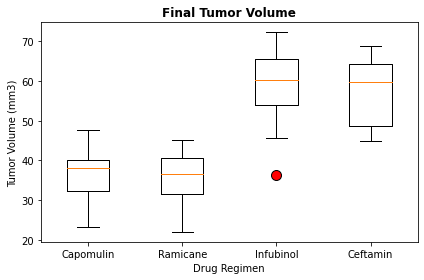

In [38]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, final_tumor_plot = plt.subplots()
final_tumor_plot.boxplot(tumor_vols, labels=box_labels, flierprops={'markerfacecolor':'r','markersize': 10})

# Add labels and title
final_tumor_plot.set_title('Final Tumor Volume',fontweight='bold')
final_tumor_plot.set_xlabel('Drug Regimen')
final_tumor_plot.set_ylabel('Tumor Volume (mm3)')
        
# Save box plot graph to Images folder
plt.tight_layout()
final_tumor_plot.figure.savefig('images/final_tumor_boxplot.png',bbox_inches = "tight")

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

## Line and Scatter Plots

In [39]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_df = pd.DataFrame(mouse_study_clean.loc[mouse_study_clean['Drug Regimen'] == 'Capomulin'])
treatment_title = Capomulin_df['Drug Regimen'].iloc[0]

#setting up datafreame & variables to plot a male mouse chart
male_mouse_id = 'm601'
male_age = Capomulin_df.loc[Capomulin_df["Mouse ID"] == male_mouse_id, 'Age_months'].values[0]
male_mouse_df = Capomulin_df.loc[Capomulin_df['Mouse ID'] == male_mouse_id]

#setting up datafreame & variables to plot a female mouse chart
female_mouse_id = 'g316'
female_age = Capomulin_df.loc[Capomulin_df["Mouse ID"] == female_mouse_id, 'Age_months'].values[0]
female_mouse_df = Capomulin_df.loc[Capomulin_df['Mouse ID'] == female_mouse_id]

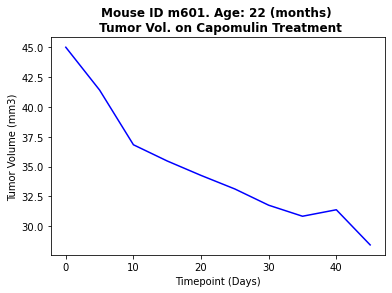

In [40]:
#male mouse line plot 
plt.plot(male_mouse_df['Timepoint'], male_mouse_df['Tumor Volume (mm3)'], color='blue')
plt.title(f"Mouse ID {male_mouse_id}. Age: {male_age} (months) \n Tumor Vol. on {treatment_title} Treatment", fontweight='bold')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.savefig('images/malemousetumorvolume.png',bbox_inches = "tight")

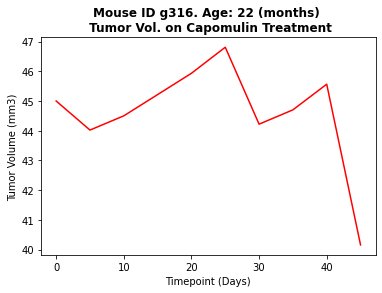

In [41]:
#female mouse line plot 
plt.plot(female_mouse_df['Timepoint'], female_mouse_df['Tumor Volume (mm3)'], color='red');
plt.title(f"Mouse ID {female_mouse_id}. Age: {female_age} (months) \n Tumor Vol. on {treatment_title} Treatment", fontweight='bold')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.savefig('images/femalemousetumorvolume.png',bbox_inches = "tight")

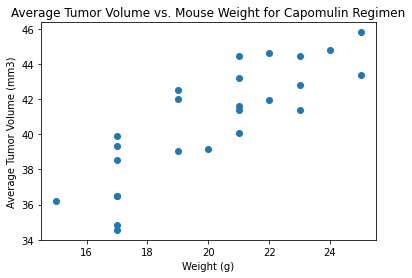

In [42]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#male mouse scatter plot 

# Calculate the average tumor volume and mouse weight for each mouse
avg_tumor_vol = Capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = Capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()

# Generate the scatter plot
plt.scatter(mouse_weight, avg_tumor_vol)

# Add axis labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title(f'Average Tumor Volume vs. Mouse Weight for {treatment_title} Regimen')
plt.savefig('images/tumorvsweight.png',bbox_inches = "tight")
# Show the plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


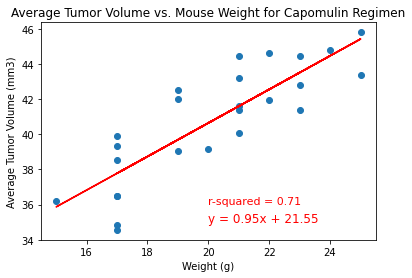

In [43]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import pearsonr, linregress
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title(f'Average Tumor Volume vs. Mouse Weight for {treatment_title} Regimen')
correlation = round(pearsonr(mouse_weight, avg_tumor_vol)[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")
slope, intercept, rvalue, pvalue, stderr = linregress(mouse_weight, avg_tumor_vol)
r_squared = round(rvalue**2,2)
regress_values = mouse_weight * slope + intercept
plt.scatter(mouse_weight, avg_tumor_vol)
plt.plot(mouse_weight, regress_values, "r")
equation = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(equation, (20, 35), fontsize=12, color="red")
plt.annotate(f'r-squared = {r_squared}', (20,36), fontsize=11, color="red");
plt.savefig('images/corr&reg&rsquared.png', bbox_inches = "tight")
plt.show()